# Intro to Neural Networks

Learning objectives:
1. Understand what neural networks can do.
2. Understand the structure of a neural network.
3. Understand forward propagation and backpropagation.
4. Understand the structure of a neuron, and be able to select appropriate activation functions.
5. Implement a neural network in keras

Prerequisites:
1. derivatives, including partial derivatives
2. gradient descent
3. chain rule

Some very good videos from 3 blue 1 brown:
- [Neural Network playlist (4 videos)](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)


# 1. Applications of Neural Networks


### Text Generation
The [GPT-2](http://jalammar.github.io/illustrated-gpt2/) model is a **decoder** model which uses previous words to predict the next one in a sequence. You can experiment with a limited version of this model at [talk to transformer](https://talktotransformer.com/). 

**Input:** In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.

**Output:** The amazing find was made by researchers of the Universidad Austral de Chile, thanks to one of the country's most highly active amateur scientists. Of course, the creature in question was not a real unicorn, but a llama, and unfortunately the strange creature was killed before researchers could analyze its vocalization.


### Image Classification
The [VGG-16](https://neurohive.io/en/popular-networks/vgg16/) model is a **deep convolutional** network that can classify image regardless of the scale or rotation of the objects in the image.

doge? | doge?
- | - 
[<img src="img/shibe.jpg" width=240 />](https://knowyourmeme.com/memes/doge) |[<img src="img/doge.jpg" width=240 />](https://en.wikipedia.org/wiki/Doge_of_Venice)


# Teacher Note: don't spend time on these.
### Image Generation
[Generative adversarial networks](https://neurohive.io/en/news/deepfake-videos-gan-sythesizes-a-video-from-a-single-photo/]) can be used to create plausible images and video.
<img src="img/gan.png" width=600 />

### AI
AlphaZero is a neural network AI that has beaten world champions in [Chess](https://www.chess.com/news/view/updated-alphazero-crushes-stockfish-in-new-1-000-game-match), [Go](https://www.theverge.com/2019/11/27/20985260/ai-go-alphago-lee-se-dol-retired-deepmind-defeat), and [Starcraft](https://www.theverge.com/2019/10/30/20939147/deepmind-google-alphastar-starcraft-2-research-grandmaster-level)

[OpenAI](https://openai.com/blog/solving-rubiks-cube/) has also applied neural networks to solving physical robotics problems.

<img src="img/rubiks.jpg" width=600 />

### Other applications

Many machine learning techniques can also be implemented through neural networks (linear regression, logistic regression, etc.)

# 2. Structure of a Neural Network

Black Box view:
<img src="img/black_box.png" width=600 />
Layer view:
<img src="img/layers.png" width=600 />

# Teacher Note: Clarify which pieces we set, which are trained.
# Q: Ask about dimension of weights
Neuron view:
<img src="img/layers_with_neurons.png" width=600 />

# Teacher Note: Clarify Notation

As functions:
$$\mathbf{y} = \mathbf{f}_y(\mathbf{W}_4, \mathbf{b}_4, \mathbf{h}_3)$$
$$\mathbf{h}_3 = \mathbf{f}_{h(3)}(\mathbf{W}_3, \mathbf{b}_3, \mathbf{h}_2)$$
$$\mathbf{h}_2 = \mathbf{f}_{h(2)}(\mathbf{W}_2, \mathbf{b}_2, \mathbf{h}_1)$$
$$\mathbf{h}_1 = \mathbf{f}_{h(1)}(\mathbf{W}_1, \mathbf{b}_1, \mathbf{x})$$


# 3. Forward propagation and backpropagation

## Forward propagation: 
1. Calculate first hidden layer from inputs
2. Calculate second hidden layer from first hidden layer
3. etc.
4. Calculate outputs from last hidden layer


In terms of the functions above,
1. $$\mathbf{h}_1 = \mathbf{f}_{h(1)}(\mathbf{W}_1, \mathbf{b}_1, \mathbf{x})$$
2. $$\mathbf{h}_2 = \mathbf{f}_{h(2)}(\mathbf{W}_2, \mathbf{b}_2, \mathbf{h}_1)$$
3. $$\mathbf{h}_3 = \mathbf{f}_{h(3)}(\mathbf{W}_3, \mathbf{b}_3, \mathbf{h}_2)$$
4. $$\mathbf{y} = \mathbf{f}_y(\mathbf{W}_4, \mathbf{b}_4, \mathbf{h}_3)$$

# Teacher Note: Ask about gradient descent

And we can calculate the value of a cost function:
$$C(\mathbf{y}, \mathbf{y}_{obs})$$

## Backpropagation 
Backpropagation is how we find the gradient across all weights so that we can do gradient descent. 

Review:
- Chain Rule

$$ z =  f(g(x)) $$
$$ u = g(x) $$
$$ \frac{dz}{dx} =  \frac{dz}{du} \frac{du}{dx}$$

For example:
$$ \frac{dC}{dW_3} = \frac{dC}{d\mathbf{y}}\frac{d\mathbf{y}}{d\mathbf{h}_3}\frac{d\mathbf{h}_3}{d\mathbf{W}_3} $$

In general:
$$ 
\frac{dC}{dW_i} = 
    \frac{dC}{d\mathbf{y}}
    \frac{d\mathbf{y}}{d\mathbf{h}_m}
    \frac{d\mathbf{h}_m}{d\mathbf{h}_{m-1}} ... 
    \frac{d\mathbf{h}_{i+1}}{d\mathbf{h}_{i}}
    \frac{d\mathbf{h}_{i}}{d\mathbf{W}_{i}}
$$

Or more compactly, 
$$   \frac{dC}{dW_i} = \frac{dC}{dh_{i}}\frac{dh_{i}}{dW_i}$$


# 4. Building a simple artificial neuron


[<img src="img/neuron.jpg" width=400 />](https://medium.com/@jayeshbahire/the-artificial-neural-networks-handbook-part-4-d2087d1f583e)


We will use the Rectified Linear Unit or [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as our activation function: 

$$    ReLU(x) = \Bigg\{
        \begin{array}{ll}
        x, & \text{if } x > 0\\
        0, & \text{otherwise }\\
        \end{array}
$$

In [1]:
from scripts import demo

inputs = demo.make_inputs(5)
weights, bias = demo.initialize_neuron(5)

In [2]:
def relu(x):
    '''
    Params
    ———-
    x: float
    
    Returns
    ———-
    output: float
    '''
    if(x > 0):
        output = x
    else:
        output = 0
    
    return output

In [3]:
# Write this together
def neuron(prev_layer, weights, bias, activation_function):
    '''
    Params
    ———-
    prev_layer: numpy.ndarray
        Should have shape (m, ). Contains output values from the previous layer.
    weights: numpy.ndarray 
        Should have shape (m, ). Contains weights connecting previous layer to this neuron
    bias: float
    activation_function: function(float)
    
    Returns
    ———-
    output: float
        the output of the neuron

    '''
    weighted_sum = sum(prev_layer * weights) + bias
    output = activation_function(weighted_sum)
    return output



For backpropagation, we'll also need a way to get derivatives across a neuron. 

$$ \varphi(z) = \Bigg\{
        \begin{array}{ll}
        z, & \text{if } z > 0\\
        0, & \text{otherwise }\\
        \end{array} $$
$$ z = w_1x_1 + w_2x_2 + ... + w_mx_m + b$$

# Q: Ask about vanishing gradient

In [4]:
def d_relu(x):
    '''
    Params
    ———-
    x: float
    
    Returns
    ———-
    output: float
    '''
    if x > 0:
        output = 1
    else:
        output = 0
    return output
        

In [5]:
def derivative_neuron(prev_layer, weights, bias, neuron_output, d_activation):
    '''
    Params
    ———-
    prev_layer: numpy.ndarray
        Should have shape (m, ). Contains output values from the previous layer.
    weights: numpy.ndarray 
        Should have shape (m, ). Contains weights connecting previous layer to this neuron
    bias: float
    activation_function: function(float)
    neuron_output: float
        This is the output of this neuron from forward propagation
    d_activation: function
        the derivative of the activation function

        
    Returns
    ———-
    output: float
        the output of the neuron

    '''
    d_dw = prev_layer * d_activation(neuron_output)
    d_dl = weights * d_activation(neuron_output)
    d_db = d_activation(neuron_output)
    return d_dw, d_dl, d_db
    

In [6]:
# Test the neuron function. (inputs, weights, bias are imported from the demo script)
inputs = demo.make_inputs(5)
weights, bias = demo.initialize_neuron(5)


print("inputs: {}".format(inputs))
print("weights: {}".format(weights))
print("bias: {}".format(bias))
print("output: {}".format(neuron(inputs, weights, bias, relu)))

neuron_output = neuron(inputs, weights, bias, relu)
d_dw, d_dl, d_db = derivative_neuron(inputs, weights, bias, neuron_output, d_relu)

print("")
print("d/dw: {}".format(d_dw))
print("d/dl: {}".format(d_dl))
print("d/db: {}".format(d_db))

inputs: [-0.43276767 -0.45503845  0.19463214 -0.38859406 -0.44386373]
weights: [-0.1742682  -0.24403437 -0.81542457 -0.88443157 -0.03426628]
bias: 0.8482223223499666
output: 1.2348715693977441

d/dw: [-0.43276767 -0.45503845  0.19463214 -0.38859406 -0.44386373]
d/dl: [-0.1742682  -0.24403437 -0.81542457 -0.88443157 -0.03426628]
d/db: 1


# 5. Recognizing Handwritten Digits

Just use Keras!

Example from https://www.tensorflow.org/datasets/keras_example

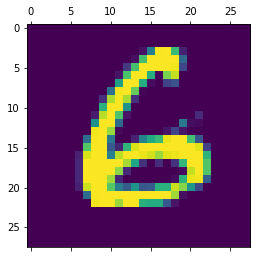

In [7]:
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

train, test = demo.mnist_data()

plt.matshow(next(tfds.as_numpy(train))[0][0][:,:,0])

In [8]:

model = tf.keras.Sequential()
model.add(layers.Flatten())
# hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# output layer
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    train,
    epochs=6,
    validation_data=test,
)

Epoch 1/6
469/469 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8918 - val_loss: 0.1999 - val_accuracy: 0.9400
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1654 - accuracy: 0.9510 - val_loss: 0.1476 - val_accuracy: 0.9564
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9643 - val_loss: 0.1120 - val_accuracy: 0.9669
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0961 - accuracy: 0.9713 - val_loss: 0.1007 - val_accuracy: 0.9690
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9759 - val_loss: 0.0916 - val_accuracy: 0.9734
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0929 - val_accuracy: 0.9727


Network thinks this image is a 2


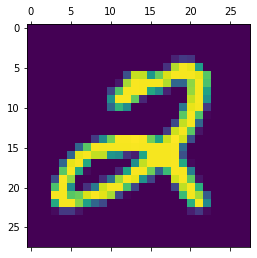

In [9]:
#Examine predictions
batch_index = 0

example = next(tfds.as_numpy(test))[0]
print("Network thinks this image is a {}".format(np.argmax(model.predict(example)[batch_index])))
plt.matshow(example[batch_index,:,:,0])

# What else would we do in a full day lesson?

- Implement the training of a neural network using numpy.
- Go over all commonly used activation functions and discuss the pros/cons of each. 
- Understand what vanishing gradient means, and how that applies to choice of activation function
- Go over commonly used cost functions
- Learn how GPUs can be used to accelerate the training of neural nets.
- Overview of convolutional layers, GRUs and LSTMs. 

# What I had difficulty with
- What are the conventions for notation of vectors, matrices, derivatives of those, etc.?
- Timing (expect to get better with this with practice)
- Technology. Ideally I'd like to provide a docker image with notebooks for all students. 
- Whiteboarding online?
- Slow down and ask questions
